Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.

In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read the csv file
df = pd.read_csv("academic_performance.csv")

In [5]:
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,NaN,8.14,9.57,10.00
1,2,Shreya Gosavi,8.50,8.50,9.32,9.82
2,3,Pranika Gosavi,6.61,0.00,9.14,9.14
3,4,Swapnil Chaudhari,7.20,7.30,8.90,NaN
4,5,Kaveri Valve,NaN,7.45,9.05,9.40
5,6,Gauri Kankal,NaN,8.00,7.91,0.00
6,7,Minal Ingale,8.27,NaN,9.68,9.14
7,8,Saish Chavan,8.68,9.00,9.59,9.66
8,9,Yamini Salve,1.00,7.64,NaN,9.39
9,10,Dhanashree Anwat,9.09,9.36,9.91,9.95


In [6]:
df.columns

Index(['Roll', 'Name', 'Femarks', 'SeMarks', 'Temarks', 'Bemarks'], dtype='object')

In [7]:
df.isnull().sum()

Roll       0
Name       0
Femarks    3
SeMarks    1
Temarks    1
Bemarks    1
dtype: int64

In [10]:
#handle NULL values
df['Femarks']=df['Femarks'].fillna(0)

In [11]:
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.14,9.57,10.00
1,2,Shreya Gosavi,8.50,8.50,9.32,9.82
2,3,Pranika Gosavi,6.61,0.00,9.14,9.14
3,4,Swapnil Chaudhari,7.20,7.30,8.90,NaN
4,5,Kaveri Valve,0.00,7.45,9.05,9.40
5,6,Gauri Kankal,0.00,8.00,7.91,0.00
6,7,Minal Ingale,8.27,NaN,9.68,9.14
7,8,Saish Chavan,8.68,9.00,9.59,9.66
8,9,Yamini Salve,1.00,7.64,NaN,9.39
9,10,Dhanashree Anwat,9.09,9.36,9.91,9.95


In [12]:
df.isnull().sum()

Roll       0
Name       0
Femarks    0
SeMarks    1
Temarks    1
Bemarks    1
dtype: int64

In [13]:
# Finding the mean of the column having NaN
mean_value = df['SeMarks'].mean()
print(mean_value)

7.265555555555555


In [14]:
#filling missing value with mean of column
df['SeMarks']=df['SeMarks'].fillna(mean_value)

In [15]:
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.140000,9.57,10.00
1,2,Shreya Gosavi,8.50,8.500000,9.32,9.82
2,3,Pranika Gosavi,6.61,0.000000,9.14,9.14
3,4,Swapnil Chaudhari,7.20,7.300000,8.90,NaN
4,5,Kaveri Valve,0.00,7.450000,9.05,9.40
5,6,Gauri Kankal,0.00,8.000000,7.91,0.00
6,7,Minal Ingale,8.27,7.265556,9.68,9.14
7,8,Saish Chavan,8.68,9.000000,9.59,9.66
8,9,Yamini Salve,1.00,7.640000,NaN,9.39
9,10,Dhanashree Anwat,9.09,9.360000,9.91,9.95


In [16]:
#fill null with 'missing'word
df['Temarks']=df['Temarks'].fillna('Missing')

In [17]:
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.140000,9.57,10.00
1,2,Shreya Gosavi,8.50,8.500000,9.32,9.82
2,3,Pranika Gosavi,6.61,0.000000,9.14,9.14
3,4,Swapnil Chaudhari,7.20,7.300000,8.9,NaN
4,5,Kaveri Valve,0.00,7.450000,9.05,9.40
5,6,Gauri Kankal,0.00,8.000000,7.91,0.00
6,7,Minal Ingale,8.27,7.265556,9.68,9.14
7,8,Saish Chavan,8.68,9.000000,9.59,9.66
8,9,Yamini Salve,1.00,7.640000,Missing,9.39
9,10,Dhanashree Anwat,9.09,9.360000,9.91,9.95


In [18]:
df.isnull().sum()

Roll       0
Name       0
Femarks    0
SeMarks    0
Temarks    0
Bemarks    1
dtype: int64

In [19]:
#dropping rows having missing value
df=df.dropna()

In [20]:
df.isnull().sum()

Roll       0
Name       0
Femarks    0
SeMarks    0
Temarks    0
Bemarks    0
dtype: int64

If there are outliers, use any of the suitable techniques to deal with them. Apply data transformations on at least one of the variables.
1. Box plot / IQR
2. Scatter plot
3. Z score

<Axes: xlabel='Femarks'>

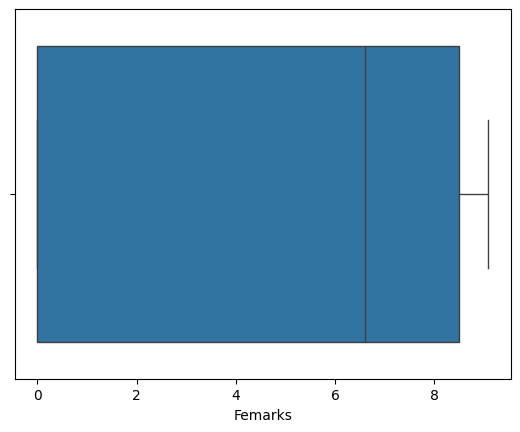

In [21]:
#drawing boxplot for Femarks
sns.boxplot(x=df['Femarks'])

In [22]:
#calculating q1,q2,IQR, lowerbouundry and upperboundry
q1 = df['Femarks'].quantile(0.25)
q3 = df['Femarks'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
lower_boundry = q1 - (1.5*iqr)
upper_boundry = q3 + (1.5*iqr)
print("IQR", iqr, "Lower and upper boundry ",lower_boundry,upper_boundry )

IQR 8.5 Lower and upper boundry  -12.75 21.25


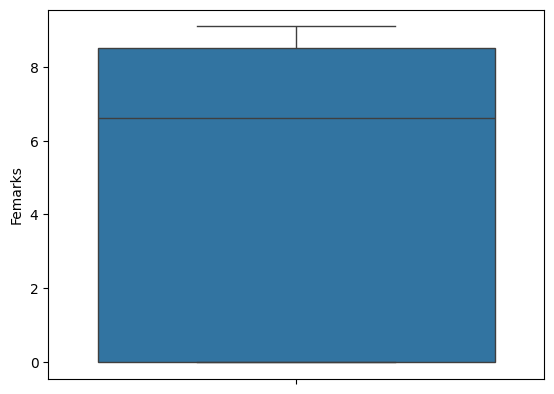

In [23]:
sns.boxplot(df['Femarks'])
plt.show()

In [24]:
#finding outliers having value <  lower_boundry and > upper_boundry
outliers = df[(df['Femarks'] < lower_boundry) | (df['Femarks'] > upper_boundry)]

In [25]:
outliers

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks


In [26]:
# drop rows containing outliers
df = df.drop(outliers.index)

In [27]:
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.140000,9.57,10.00
1,2,Shreya Gosavi,8.50,8.500000,9.32,9.82
2,3,Pranika Gosavi,6.61,0.000000,9.14,9.14
4,5,Kaveri Valve,0.00,7.450000,9.05,9.40
5,6,Gauri Kankal,0.00,8.000000,7.91,0.00
6,7,Minal Ingale,8.27,7.265556,9.68,9.14
7,8,Saish Chavan,8.68,9.000000,9.59,9.66
8,9,Yamini Salve,1.00,7.640000,Missing,9.39
9,10,Dhanashree Anwat,9.09,9.360000,9.91,9.95


In [28]:
# change vale to create outliers
df.at[7,'SeMarks']=20

In [29]:
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.140000,9.57,10.00
1,2,Shreya Gosavi,8.50,8.500000,9.32,9.82
2,3,Pranika Gosavi,6.61,0.000000,9.14,9.14
4,5,Kaveri Valve,0.00,7.450000,9.05,9.40
5,6,Gauri Kankal,0.00,8.000000,7.91,0.00
6,7,Minal Ingale,8.27,7.265556,9.68,9.14
7,8,Saish Chavan,8.68,20.000000,9.59,9.66
8,9,Yamini Salve,1.00,7.640000,Missing,9.39
9,10,Dhanashree Anwat,9.09,9.360000,9.91,9.95


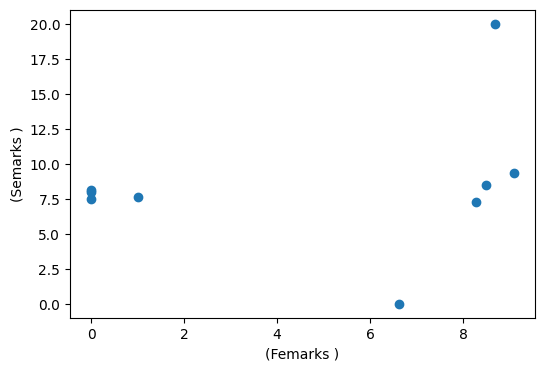

In [30]:
#draw a scatter plot for finding outlier
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['Femarks'], df['SeMarks'])
ax.set_xlabel('(Femarks )')
ax.set_ylabel('(Semarks )')
plt.show()

In [31]:
SEoutliers = df[(df['SeMarks'] > 15)]
SEoutliers

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
7,8,Saish Chavan,8.68,20.0,9.59,9.66


In [32]:
# Finding the mean of the column having NaN
median_value = df['SeMarks'].median()
print(median_value)

8.0


In [33]:
#insert outlier with median value
df.at[7,'SeMarks']=median_value

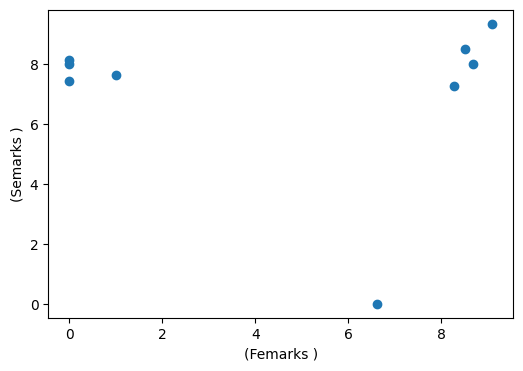

In [34]:
#draw a scatter plot to check  outlier removal
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['Femarks'], df['SeMarks'])
ax.set_xlabel('(Femarks )')
ax.set_ylabel('(Semarks )')
plt.show()

In [35]:
#insert outlier with
df.at[2,'Bemarks']=40
df

,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.140000,9.57,10.00
1,2,Shreya Gosavi,8.50,8.500000,9.32,9.82
2,3,Pranika Gosavi,6.61,0.000000,9.14,40.00
4,5,Kaveri Valve,0.00,7.450000,9.05,9.40
5,6,Gauri Kankal,0.00,8.000000,7.91,0.00
6,7,Minal Ingale,8.27,7.265556,9.68,9.14
7,8,Saish Chavan,8.68,8.000000,9.59,9.66
8,9,Yamini Salve,1.00,7.640000,Missing,9.39
9,10,Dhanashree Anwat,9.09,9.360000,9.91,9.95


In [38]:
#find oulier in tecomp
from scipy import stats
z = np.abs(stats.zscore(df['Bemarks']))
print(z)

0    0.185977
1    0.203332
2    2.706528
4    0.243827
5    1.150146
6    0.268896
7    0.218759
8    0.244792
9    0.190798
Name: Bemarks, dtype: float64


In [39]:
#remove outlier having z score > 2
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)
no_outliers

Original DataFrame Shape: (9, 6)
DataFrame Shape after Removing Outliers: (8, 6)


,Roll,Name,Femarks,SeMarks,Temarks,Bemarks
0,1,Shraddha Rajesh Chavan,0.00,8.140000,9.57,10.00
1,2,Shreya Gosavi,8.50,8.500000,9.32,9.82
4,5,Kaveri Valve,0.00,7.450000,9.05,9.40
5,6,Gauri Kankal,0.00,8.000000,7.91,0.00
6,7,Minal Ingale,8.27,7.265556,9.68,9.14
7,8,Saish Chavan,8.68,8.000000,9.59,9.66
8,9,Yamini Salve,1.00,7.640000,Missing,9.39
9,10,Dhanashree Anwat,9.09,9.360000,9.91,9.95
